### Module Import

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#from PIL import Image

### 1. Edge Detection

#### Load Image

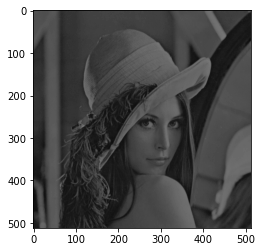

In [8]:
file = "./lena_raw_512x512.raw"
fileID = open(file, "rb")
Img = np.fromfile(fileID, dtype = 'uint8', sep = "")
Img = np.reshape(Img, [512, 512])
plt.imshow(Img, cmap='gray', vmin=0, vmax=500)

#### Roberts

In [55]:
def getRoberts(img, threshold):
    G_x = np.array([[1, 0],
                    [0, -1]])
    G_y = np.array([[0, -1], 
                    [1, 0]])
    
    row = img.shape[0]
    col = img.shape[1]

    edge_img = []

    for i in range(row):
        for j in range(col):
            try:
                x = 0
                y = 0
                for r in range(G_x.shape[0]):
                    for c in range(G_x.shape[1]):
                        x = x + img[i + r, j + c]*G_x[r, c]
                        y = y + img[i + r, j + c]*G_y[r, c]
            except:
                x = 0
                y = 0
            magnitude = abs(x) + abs(y)

            if(magnitude < threshold):
                edge_img.append(0)
            else:
                edge_img.append(255)
    edge_img = np.array(edge_img)
    edge_img = np.reshape(edge_img, [512, 512])
    return edge_img

#### Sobel

In [56]:
def getSobel(img, threshold):
    G_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    G_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
    
    row = img.shape[0]
    col = img.shape[1]

    edge_img = []

    for i in range(row):
        for j in range(col):
            try:
                x = 0
                y = 0
                for r in range(G_x.shape[0]):
                    for c in range(G_x.shape[1]):
                        x = x + img[i + r, j + c]*G_x[r, c]/4
                        y = y + img[i + r, j + c]*G_y[r, c]/4
            except:
                x = 0
                y = 0
            magnitude = abs(x) + abs(y)

            if(magnitude < threshold):
                edge_img.append(0)
            else:
                edge_img.append(255)
    edge_img = np.array(edge_img)
    edge_img = np.reshape(edge_img, [512, 512])
    return edge_img

#### Prewit

In [77]:
def getPrewit(img, threshold):
    G_x = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])
    G_y = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])
    
    row = img.shape[0]
    col = img.shape[1]

    edge_img = []

    for i in range(row):
        for j in range(col):
            try:
                x = 0
                y = 0
                for r in range(G_x.shape[0]):
                    for c in range(G_x.shape[1]):
                        x = x + img[i + r, j + c]*G_x[r, c]/3
                        y = y + img[i + r, j + c]*G_y[r, c]/3
            except:
                x = 0
                y = 0
            magnitude = abs(x) + abs(y)

            if(magnitude < threshold):
                edge_img.append(0)
            else:
                edge_img.append(255)
    edge_img = np.array(edge_img)
    edge_img = np.reshape(edge_img, [512, 512])
    return edge_img

#### Test

In [78]:
threshold = 64

robert_img = getRoberts(Img, threshold)
sobel_img = getSobel(Img, threshold)
prewit_img = getPrewit(Img, threshold)


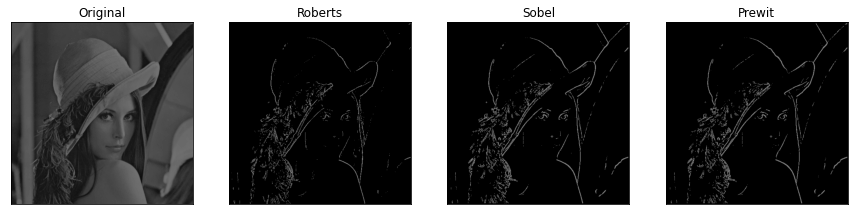

In [79]:
fig = plt.figure(figsize = (15,15))

plt.subplot(1,4,1)
plt.imshow(Img, cmap='gray', vmin=0, vmax=500)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(robert_img, cmap='gray', vmin=0, vmax=500)
plt.title('Roberts')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(sobel_img, cmap='gray', vmin=0, vmax=500)
plt.title('Sobel')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.imshow(prewit_img, cmap='gray', vmin=0, vmax=500)
plt.title('Prewit')
plt.xticks([])
plt.yticks([])
plt.show()

### 2. Low-pass & Median Filters

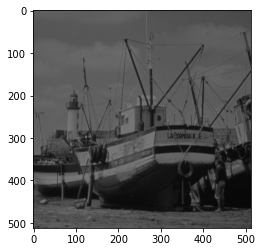

In [ ]:
# load image
file = "./BOAT512.raw"
fileID = open(file, "rb")
Img = np.fromfile(fileID, dtype = 'uint8', sep = "")
Img = np.reshape(Img, [512, 512])
plt.imshow(Img,cmap='gray', vmin=0, vmax=500)